In [42]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import math
%matplotlib inline
import matplotlib.pyplot as plt



In [5]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


In [13]:
df.drop('Adj Close',axis=1,inplace=True)

In [14]:
df.describe()

,Open,High,Low,Close,Volume
count,2392.000000,2392.000000,2392.000000,2392.000000,2.392000e+03
mean,36.649554,37.283815,35.986936,36.657329,2.711845e+07
std,22.876772,23.231798,22.509281,22.889387,2.353644e+07
min,3.228000,3.326000,2.996000,3.160000,5.925000e+05
25%,6.852000,6.960000,6.710000,6.869500,9.365000e+06
50%,42.445002,43.211000,41.623002,42.334000,2.264150e+07
75%,52.797000,53.558498,52.023500,52.780499,3.619625e+07
max,87.000000,87.061996,85.269997,86.188004,1.858195e+08


In [15]:
df.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [16]:
df.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

<AxesSubplot:>

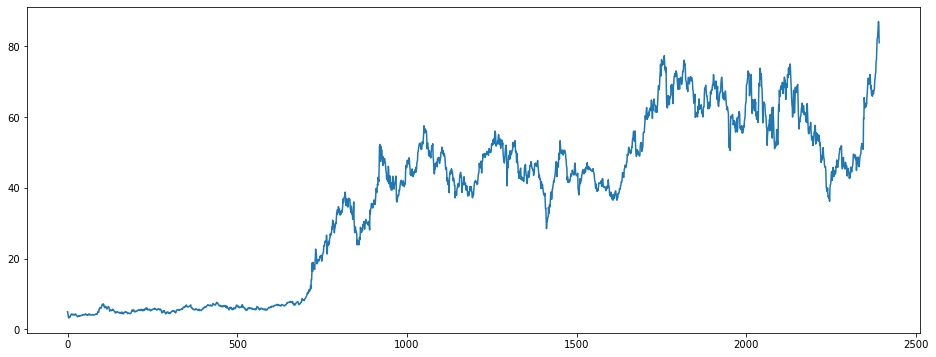

In [19]:
df['Open'].plot(figsize = (16,6))

In [22]:
x = df[['Open','High','Low','Volume']]
y = df['Close']


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)



In [25]:
x_train.shape

(1913, 4)

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
print(lr.coef_)

[-6.55828442e-01  8.81454718e-01  7.73322216e-01 -5.44455138e-10]


In [31]:
print(lr.intercept_)

0.00870385619476366


In [32]:
prediction = lr.predict(x_test)

In [34]:
print(x_test)

           Open       High        Low    Volume
1004  46.938000  48.000000  46.900002  28175000
196    5.294000   5.306000   5.004000   6847000
2342  51.666000  51.900002  50.035999  25101500
1708  59.340000  61.478001  59.060001  46423000
435    6.994000   7.030000   6.860000   2612000
...         ...        ...        ...       ...
986   40.698002  41.599998  40.518002  19304000
120    6.360000   6.538000   6.342000   3888500
283    5.324000   5.350000   5.186000   3693000
1740  67.538002  68.578003  67.031998  49817000
1726  64.311996  65.099998  63.624001  28708000

[479 rows x 4 columns]


In [35]:
dfr = pd.DataFrame({'actual price':y_test,'predicted price':prediction})

In [36]:
dfr

,actual price,predicted price
1004,47.812000,47.788728
196,5.054000,5.079723
2342,50.700001,50.552456
1708,60.799999,60.929054
435,6.880000,6.922035
...,...,...
986,40.987999,41.309272
120,6.452000,6.502878
283,5.246000,5.241294
1740,68.202003,67.973976


In [37]:
dfr.head(10)

,actual price,predicted price
1004,47.812000,47.788728
196,5.054000,5.079723
2342,50.700001,50.552456
1708,60.799999,60.929054
435,6.880000,6.922035
321,5.398000,5.360922
1472,42.986000,42.665607
1703,59.740002,59.769307
900,35.046001,35.348200
1057,55.840000,55.832532


In [38]:
lr.score(x_test,y_test)

0.9997625236441491

In [43]:
# errors
print('mean abs error :',metrics.mean_absolute_error(y_test,prediction))
print('mean squared error:',metrics.mean_squared_error(y_test,prediction))
print('root mean squared error:',math.sqrt(metrics.mean_squared_error(y_test,prediction)))

mean abs error : 0.24256093212634147
mean squared error: 0.1334148418617565
root mean squared error: 0.36525996476722783


<AxesSubplot:>

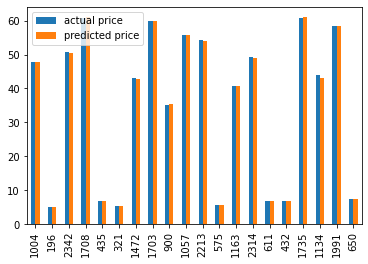

In [44]:
graph = dfr.head(20)
graph.plot(kind = 'bar')

In [47]:
lr.predict([[46.938000 , 48.000000 , 46.900002 , 28175000]])

C:\Users\kartheek\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47.78872835])

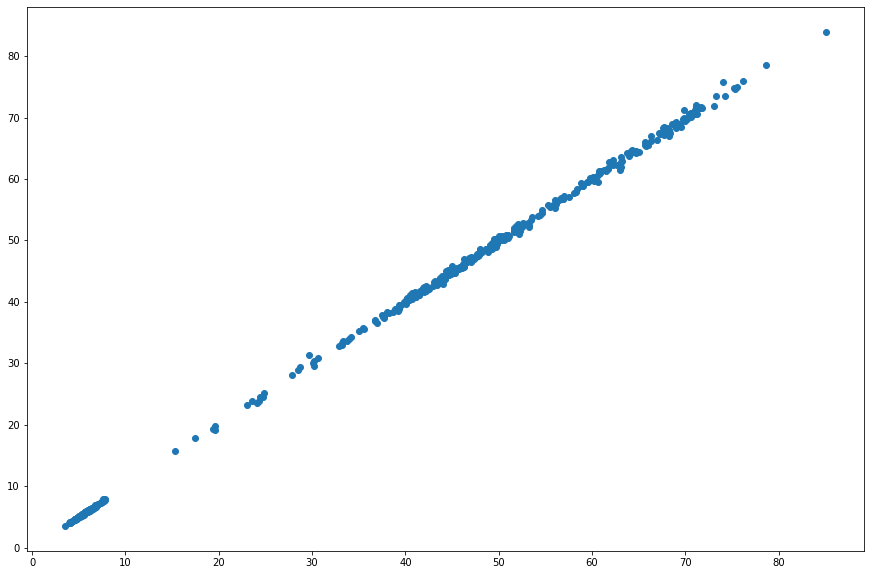

In [48]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,prediction)
